# **Importing necessary libraries**

In [0]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model


Using TensorFlow backend.


In [0]:
class NeuralNet(object):

    def __init__(self):
        # loading mnist data
        (X_train,y_train), (X_test,y_test) = mnist.load_data()

         # feature scaling and normalization
        self.training_images = X_train.reshape((60000, 28 , 28,1)).astype('float32') / 255
        self.training_targets = to_categorical(y_train)

        self.test_images = X_test.reshape((10000, 28 , 28,1)).astype('float32') / 255
        self.test_targets = to_categorical(y_test)

        self.input_shape = (self.training_images.shape[1],)

        # building the Machine Learning model
        self.model = Sequential()
        self.model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
        self.model.add(MaxPooling2D((2,2)))
        self.model.add(Conv2D(64, (3,3), activation='relu'))
        self.model.add(MaxPooling2D((2,2)))
        self.model.add(Conv2D(64, (3,3), activation='relu'))
        self.model.add(Flatten())
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(10, activation='softmax'))
        print(self.model.summary())

        self.model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(self.training_images, self.training_targets, validation_split=0.3, callbacks=[EarlyStopping(patience=5)], epochs=5)
        #self.model.save("neuralnet")
        #self.model = load_model("neuralnet")

    def predict(self, image):
        input = cv2.resize(image, (28 , 28)).reshape((28 , 28,1)).astype('float32') / 255
        return self.model.predict_classes(np.array([input]))



In [0]:
net = NeuralNet()


11493376/11490434 [==============================] - 0s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (De

# Upload Prediction

In [0]:
from google.colab import files
files.upload()

Saving out.npy to out.npy


{'out.npy': b"\x93NUMPY\x01\x00v\x00{'descr': '|u1', 'fortran_order': False, 'shape': (400, 400), }                                                      \n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

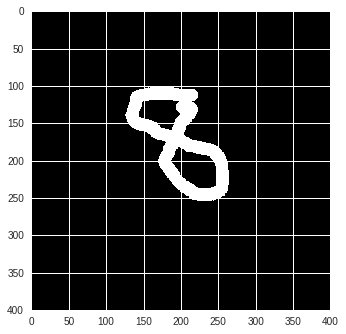

In [0]:
result = net.predict(x)
print("PREDICTION : ", result)


PREDICTION :  [3]
